# Summer Bootcamp project 2024
- Mohammed Shaquib khan
- 2022429026

# Index
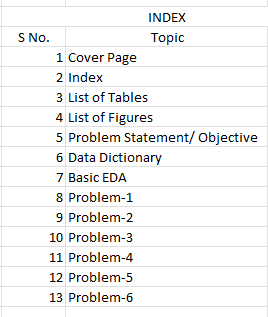

# List of Tables
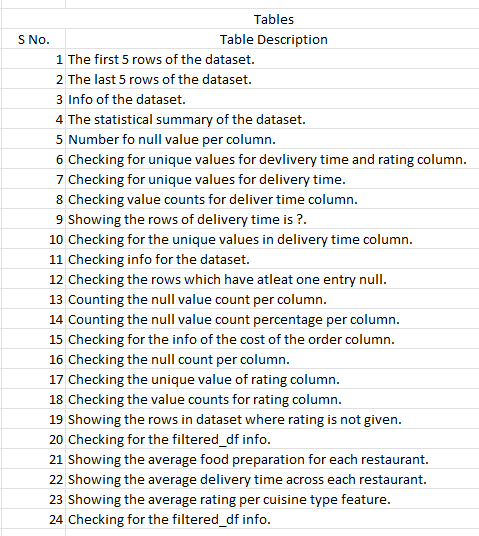

# List of Figures
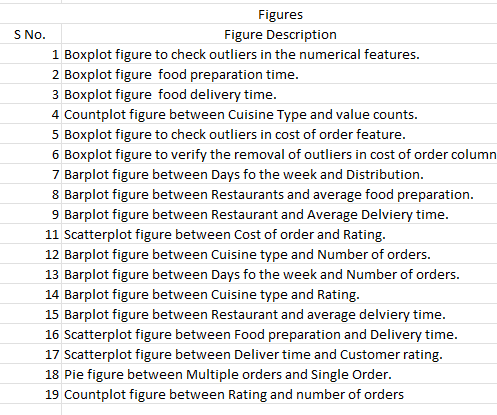


# Problem Statement / Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description
The data contains the different data related to a food order. The detailed data dictionary is given below.
Data Dictionary
* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

# Importing the necessary Libraries

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset

In [54]:
df = pd.read_csv('2-foodhub_order_New.csv')

# Basic Steps:

## 1- First Five Rows

In [55]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25.0,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25.0,?
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23.0,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25.0,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25.0,24


       
                                                      Table No. 1

## Observations
* There is some wrong entry in delivery_time column, will have to fix later
* There is a Not given entries in rating column, will have to check later

## 2 - Last Five Rows

In [56]:
df.tail()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31.0,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31.0,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31.0,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23.0,31
1897,1478056,120353,Blue Ribbon Sushi,Japanese,19.45,Weekend,Not given,28.0,24



        
                                                        Table No. 2

## Observations
* Here also there are some not given entries in column rating which we need to fix later

## 3 - Shape of dataset

In [57]:
df.shape

(1898, 9)

## Observations
* There are 1898 rows and 9 columns in the dataset

## 4 - Check datatypes of each feature

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1895 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1896 non-null   float64
 8   delivery_time          1898 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 133.6+ KB


                  Table No. 3

## Observations
* There are 5 null entries in any column
* There are 2 float, 2 int and 5 object datatyes in the dataset
* We know that order_id and custormer_id are categories but they are stored as int which is alright for now
* Rating column should be stored as int but it is object here so there must be some string anamoly or not given entry, need to further explore it
* delivery time is appearing as object but it should be numerical column so we need to fix later

## 5 - Statistical summary

In [59]:
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time
count,1.898000e+03,1898.000000,1898.000000,1896.000000
mean,1.477496e+06,171168.478398,80.722007,27.371835
std,5.480497e+02,113698.139743,2798.141333,4.634211
min,1.476547e+06,1311.000000,0.000000,20.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000
50%,1.477496e+06,128600.000000,14.160000,27.000000
75%,1.477970e+06,270525.000000,22.310000,31.000000
max,1.478444e+06,405334.000000,121920.000000,35.000000




                                                        
                          Table No. 4

## Observations
* minimum value of cost order can not be 0, so will have to check later
* maximum value fo cost of order is much higher, it is an outlier need to check later

## 6 - Check for null values

In [60]:
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             3
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    2
delivery_time            0
dtype: int64


      Table No. 5

## Observations
* There are 5 null entries in the dataset, 3 in cuisine_type and 2 in food_preparation_time, will have to check later

## 7 - Duplicate values

In [61]:
df.duplicated().sum()

0

## Observations
* There are no duplicated rows in the dataset

## 8 - Check for anomalies or wrong entries

In [62]:
# here i will check for deliver_time and rating column because as seen earlier there datatype should be numerical in real life but it is object
print('for deliver_time column:',df['delivery_time'].unique())
print('for rating column:',df['rating'].unique())

for deliver_time column: ['20' '?' '28' '15' '24' '21' '30' '26' '22' '17' '23' '25' '16' '29' '27'
 '18' '31' '32' '19' '33']
for rating column: ['Not given' '5' '3' '4']




                                                    Table No.6

## Observations

* in deliver_time column we have a string "?" entry instead of a numeric so there is an anomaly here
* as for rating column there is an entry Not given in some rows so will have to check later

## 9 - Check for outliers and their authenticity

<function matplotlib.pyplot.show(close=None, block=None)>

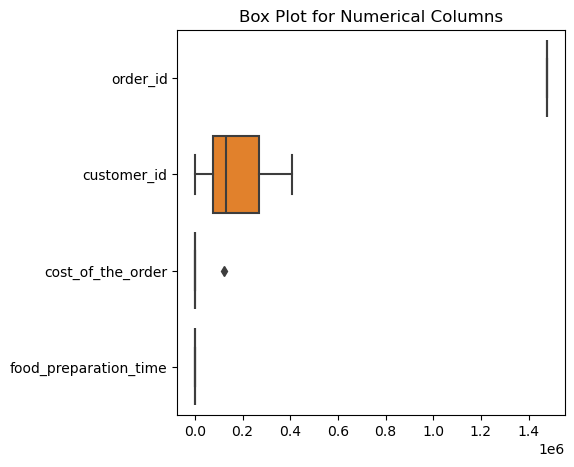

In [63]:
plt.figure(figsize=(5,5))
sns.boxplot(data=df, orient='h')
plt.title('Box Plot for Numerical Columns')
plt.show


                                            Fig No. 1

## Observations

* after observing the graphs it is seen that only cost_of_the_order column has an outlier which we need to fix later

## 10 - Data Cleaning

#### 1 - Correcting data types

## Observations
* we will convert deliver_time from object to float later when we remove and replace the invalid entry

#### 2 - Duplicate values

In [64]:
# checking for duplicate rows
df.duplicated().sum()

0

## Observations
* as there are no duplicated rows so no need to drop rows

#### 3 - Invalid values / Wrong Entries

In [65]:
# we know we will check for deliver_time column and rating column
# checking for unique values for 'deliver_time'
df['delivery_time'].unique()

array(['20', '?', '28', '15', '24', '21', '30', '26', '22', '17', '23',
       '25', '16', '29', '27', '18', '31', '32', '19', '33'], dtype=object)


                              Table No.7

* Getting count of each unique entry

In [66]:
df['delivery_time'].value_counts()

delivery_time
24    161
28    148
29    148
26    141
27    138
30    133
25    120
19     90
16     90
20     88
15     87
22     85
18     83
21     81
17     78
23     76
32     59
33     49
31     41
?       2
Name: count, dtype: int64

         Table No. 8

* getting rows with 'delivery time' as '?'

In [67]:
df[df['delivery_time']=='?']

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25.0,?
180,1476808,84700,Pepe Giallo,Italian,14.60,Weekday,3,32.0,?



                                    
                                               Table No. 9

* replacing the '?' with null value


In [68]:
df['delivery_time']=df['delivery_time'].replace('?',np.nan)

In [69]:
df['delivery_time'].unique()

array(['20', nan, '28', '15', '24', '21', '30', '26', '22', '17', '23',
       '25', '16', '29', '27', '18', '31', '32', '19', '33'], dtype=object)

                                        
                            Table No. 10

* Now verifying changes

In [70]:
df[df['delivery_time']=='?']

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time


* Now we can change datatype of this column from object to numeric

In [71]:
df['delivery_time'] = df['delivery_time'].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1895 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1896 non-null   float64
 8   delivery_time          1896 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 133.6+ KB



                 Table No. 11

#### 4 - Missing values / Null values

In [72]:
df[df.isnull().sum(axis=1)>0]

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25.0,NaN
11,1478437,221206,Empanada Mama (closed),NaN,8.10,Weekend,5,23.0,22.0
51,1477883,91817,Blue Ribbon Fried Chicken,NaN,29.39,Weekend,Not given,27.0,28.0
95,1477027,164016,Blue Ribbon Fried Chicken,NaN,16.39,Weekend,Not given,27.0,22.0
140,1477376,370372,Blue Ribbon Fried Chicken,American,11.59,Weekday,Not given,NaN,24.0
180,1476808,84700,Pepe Giallo,Italian,14.60,Weekday,3,32.0,NaN
188,1477872,300670,Shake Shack,American,13.39,Weekend,Not given,NaN,22.0



                                                    Table No. 12

* check for missing value in columns


In [73]:
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             3
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    2
delivery_time            2
dtype: int64

      Table No. 13

* check for percentage wise missing values in columns

In [74]:
df.isnull().sum()/len(df)*100

order_id                 0.000000
customer_id              0.000000
restaurant_name          0.000000
cuisine_type             0.158061
cost_of_the_order        0.000000
day_of_the_week          0.000000
rating                   0.000000
food_preparation_time    0.105374
delivery_time            0.105374
dtype: float64

          Table No. 14

* firstly checking for outliers in numeric columns where there are null values


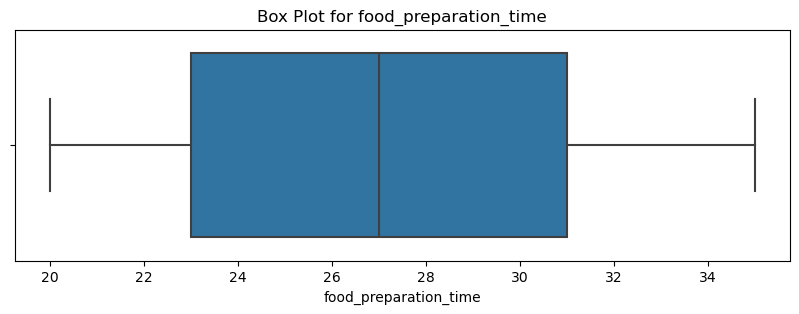

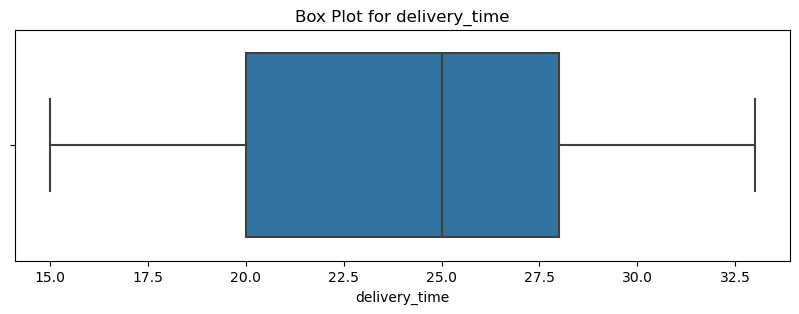

In [75]:
for i in ['food_preparation_time','delivery_time']:
    plt.figure(figsize=(10,3))
    sns.boxplot(data = df, x=i)
    plt.title(f'Box Plot for {i}')
    plt.show()

                                          Fig No. 2 and Fig No. 3

## Observations
* as we can see there are no outliers in these 2 numeric columns where there are null entries

#### Now let us check for outliers in  categorical column which has null entries
* Understanding the distribution 

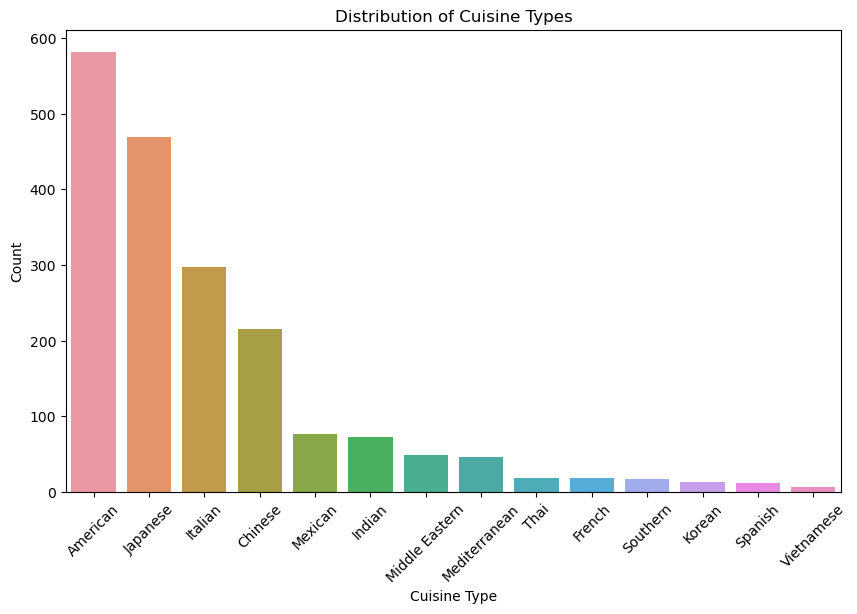

In [76]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='cuisine_type',order=df['cuisine_type'].value_counts().index)
plt.title('Distribution of Cuisine Types')
plt.xlabel('Cuisine Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


                                                  Fig No. 4

# Observation
* here we can see american cuisine is the most ordered and vietnamese is least orderd

In [77]:
# Define the function to calculate lower and upper bounds
def remove_outliers(col):
    sorted(col)
    Q1,Q3 = col.quantile([0.25,0.75])
    IQR = Q3-Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

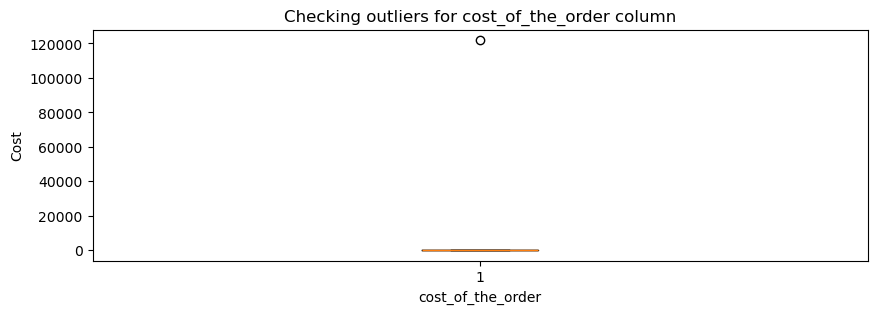

In [78]:
# plotting graph to check for outliers in cost_of_the_order column
plt.figure(figsize=(10,3))
plt.boxplot(data=df,x='cost_of_the_order')
plt.ylabel('Cost')

plt.xlabel('cost_of_the_order')
plt.title('Checking outliers for cost_of_the_order column')
plt.show()


                                                     Fig No. 5                    

In [79]:
# Calculate the lower and upper bounds for the 'cost_of_the_order' column
ll,ul = remove_outliers(df['cost_of_the_order'])

# Now removing outliers for column cost_of_the_order
df['cost_of_the_order']=np.where(df['cost_of_the_order']>ul,ul,df['cost_of_the_order'])
df['cost_of_the_order']=np.where(df['cost_of_the_order']<ll,ll,df['cost_of_the_order'])

In [121]:
# Verifying changes
print(df['cost_of_the_order'].describe())

count    1898.000000
mean       16.505809
std         7.507834
min         0.000000
25%        12.080000
50%        14.160000
75%        22.310000
max        37.655000
Name: cost_of_the_order, dtype: float64


           Table No.15

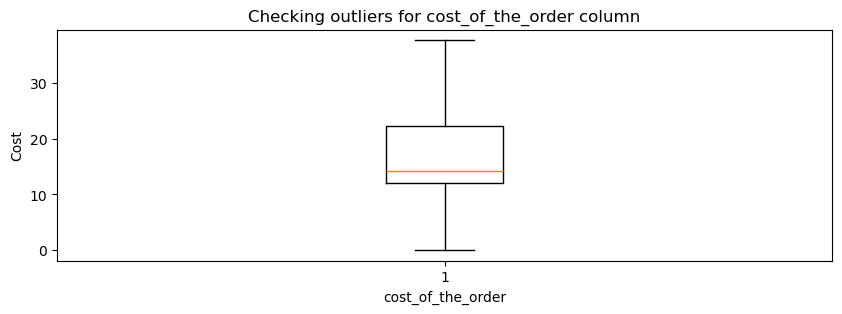

In [122]:
plt.figure(figsize=(10,3))
plt.boxplot(data=df,x='cost_of_the_order')
plt.ylabel('Cost')
plt.xlabel('cost_of_the_order')
plt.title('Checking outliers for cost_of_the_order column')
plt.show()


                                                     Fig No. 6

# Observation
* checking for null values in my dataset and we have found that null percentage in are null entries in 3 columns

In [81]:
# Now for the cuisine_type column it is a categorical column so we use mode
mode_cus = df['cuisine_type'].mode().values[0]
df['cuisine_type']=df['cuisine_type'].replace(np.nan,mode_cus)

In [82]:
# Now for food_preparation_time, diliver_time and rating column they are all numeric and there are no outliers so we use mean
mean_food = df['food_preparation_time'].mean()
mean_delivery = df['delivery_time'].mean()

df['food_preparation_time'].replace(np.nan,mean_food,inplace=True)
df['delivery_time'].replace(np.nan,mean_delivery,inplace=True)


* Now verifying the changes

In [83]:
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

    Table No. 16

# Observation

* After completing my data cleaning let us check for null values we can see that all null entries were removed now we can perform further analysis

### We have a rating column where Not given entry occurs we can not work with that so we fix it first

* Now well do for rating column

In [84]:
df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

             Table No. 17

In [85]:
df['rating'].value_counts()

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64

     Table No. 18

* Here checking rows in datset where rating entry is not given

In [86]:
df[df['rating']=='Not given']

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25.0,20.000000
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25.0,24.162447
6,1477894,157711,The Meatball Shop,Italian,6.07,Weekend,Not given,28.0,21.000000
10,1477895,143926,Big Wong Restaurant _¤¾Ñ¼,Chinese,5.92,Weekday,Not given,34.0,28.000000
14,1478198,62667,Lucky's Famous Burgers,American,12.13,Weekday,Not given,23.0,30.000000
...,...,...,...,...,...,...,...,...,...
1887,1476873,237616,Shake Shack,American,5.82,Weekend,Not given,26.0,30.000000
1891,1476981,138586,Shake Shack,American,5.82,Weekend,Not given,22.0,28.000000
1892,1477473,97838,Han Dynasty,Chinese,29.15,Weekend,Not given,29.0,21.000000
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31.0,24.000000


                                                        Table No. 19

# Observation

* Here we have Not given entry in our rating column which occurs 736 times so we will have to extract a new dataframe from it where  only rows which have a valid rating entries is given to perform analysis on questions where rating is required

In [87]:
# we will create df excluding rows with not given entry ratings
filtered_df = df[df['rating']!='Not given']
filtered_df['rating'] = filtered_df['rating'].astype(float)


C:\Users\basha\AppData\Local\Temp\ipykernel_19680\3728197928.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['rating'] = filtered_df['rating'].astype(float)


* Now lets us print filtered_df info

In [88]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1162 entries, 2 to 1896
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1162 non-null   int64  
 1   customer_id            1162 non-null   int64  
 2   restaurant_name        1162 non-null   object 
 3   cuisine_type           1162 non-null   object 
 4   cost_of_the_order      1162 non-null   float64
 5   day_of_the_week        1162 non-null   object 
 6   rating                 1162 non-null   float64
 7   food_preparation_time  1162 non-null   float64
 8   delivery_time          1162 non-null   float64
dtypes: float64(4), int64(2), object(3)
memory usage: 90.8+ KB



                 Table No. 20

# 1. Order Analysis

### •	What is the total number of orders in the dataset?

In [89]:
num_orders = df.shape[0]
print('The total number of orders in the data set are: ',num_orders)

The total number of orders in the data set are:  1898


# Observation

* The total number of orders in the data set are:  1898

### •	What is the average cost of an order?

In [90]:
avg_cost = df['cost_of_the_order'].mean()
print(f"The average cost of order is: {avg_cost:.4f}")


The average cost of order is: 16.5058


# Observation
* The average cost of order is: 16.5058

### •	How many unique customers have placed orders?

In [91]:
uni_cust = df['customer_id'].nunique()
print(f"Number of unique customers are: {uni_cust}")

Number of unique customers are: 1200


# Observation
* Number of unique customers are: 1200

### •	Which restaurant has received the highest number of orders?

In [92]:
res_order_counts = df['restaurant_name'].value_counts()
top_restaurant = res_order_counts.index[0]
print(f"The restaurant with the highest number of orders is: {top_restaurant}")

The restaurant with the highest number of orders is: Shake Shack


# Observation
* The restaurant with the highest number of orders is: Shake Shack

# 2. Customer Behavior

### •	What is the average rating given by customers?

In [93]:
avg_rating = filtered_df['rating'].mean()
print(f"The average rating by customers is: {avg_rating}")

The average rating by customers is: 4.344234079173838


# Observation
* The average rating by customers is: 4.344234079173837

### •	How does the rating vary between weekdays and weekends?

In [123]:
average_ratings = filtered_df.groupby('day_of_the_week')['rating'].mean()


print('Average rating on Weekdays: {:.2f}'.format(average_ratings['Weekday']))
print('Average rating on Weekends: {:.2f}'.format(average_ratings['Weekend']))


Average rating on Weekdays: 4.31
Average rating on Weekends: 4.36


# Observation
* Average rating on Weekdays: 4.32
* Average rating on Weekends: 4.35

### •	Which cuisine type is ordered the most?

In [95]:
most_order_cuisine = df['cuisine_type'].value_counts()
print("most ordered cuisine is: ",most_order_cuisine.index[0])

most ordered cuisine is:  American


# Obervation
* most ordered cuisine is:  American

### •	What is the distribution of orders across different days of the week?

In [96]:
order_distribution = df['day_of_the_week'].value_counts()
print(order_distribution)


day_of_the_week
Weekend    1351
Weekday     547
Name: count, dtype: int64


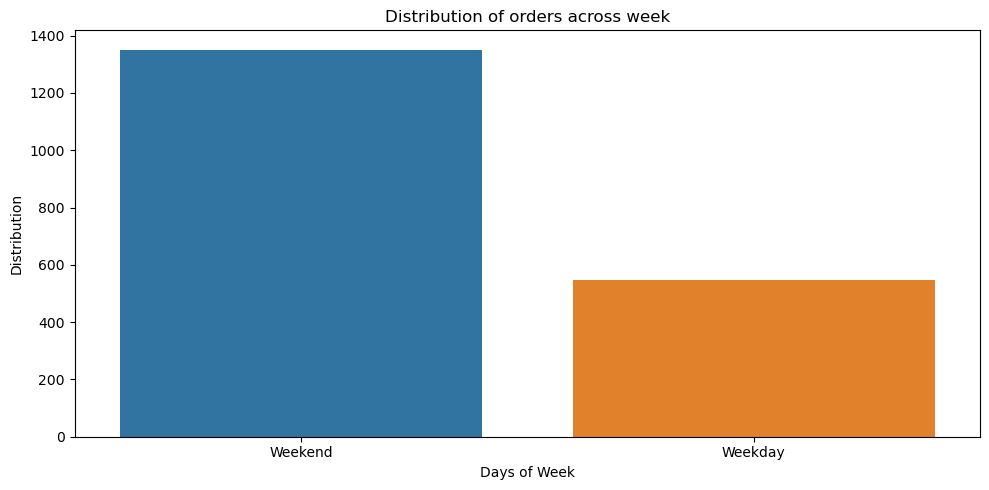

In [97]:
plt.figure(figsize=(10,5))
sns.barplot(x=order_distribution.index,y=order_distribution.values)
plt.title('Distribution of orders across week')
plt.xlabel('Days of Week')
plt.ylabel('Distribution')
plt.tight_layout()
plt.show()  

                                                        Fig No. 7

# Observation
* day_of_the_week
* Weekend    1351
* Weekday     547

# 3. Restaurant Performance

###  •	What is the average food preparation time for each restaurant?

In [98]:
avg_food_prep_rest= df.groupby('restaurant_name')['food_preparation_time'].mean()
print("Restaurant: Average food preparation time")
for restaurant, avg_time in avg_food_prep_rest.items():
    print(f"{restaurant}: {avg_time:.2f}")
  

Restaurant: Average food preparation time
'wichcraft: 28.00
12 Chairs: 27.00
5 Napkin Burger: 30.20
67 Burger: 20.00
Alidoro: 34.00
Amma: 26.25
Amy Ruth's: 28.67
Anjappar Chettinad: 21.00
Asuka Sushi: 26.00
Aurora: 30.50
Balade: 25.00
Balthazar Boulangerie: 28.00
Barbounia: 28.33
Bareburger: 27.41
Benihana: 23.80
Bhatti Indian Grill: 26.50
Big Daddy's: 27.00
Big Wong Restaurant _¤¾Ñ¼: 34.00
Bistango: 24.50
Blue Ribbon Brooklyn: 27.25
Blue Ribbon Fried Chicken: 27.22
Blue Ribbon Sushi: 27.92
Blue Ribbon Sushi Bar & Grill: 26.30
Blue Ribbon Sushi Izakaya: 28.72
Boqueria: 28.78
Bubby's : 31.33
Bukhara Grill: 26.00
Burger Joint: 27.50
Byblos Restaurant: 32.50
Cafe Habana: 26.75
Cafe Mogador: 25.28
Cafe de La Esquina: 27.00
Cafeteria: 29.33
CafÌ© China: 26.50
Carmine's: 29.00
Chipotle Mexican Grill $1.99 Delivery: 26.00
Cho Dang Gol: 23.83
Chola Eclectic Indian Cuisine: 30.00
Chote Nawab: 24.00
Cipriani Le Specialita: 35.00
Coppola's East: 32.00
Crema Restaurante: 31.00
Delicatessen: 27.20

In [99]:
print(avg_food_prep_rest)

restaurant_name
'wichcraft          28.000000
12 Chairs           27.000000
5 Napkin Burger     30.200000
67 Burger           20.000000
Alidoro             34.000000
                      ...    
Zero Otto Nove      30.000000
brgr                25.000000
da Umberto          24.333333
ilili Restaurant    26.388889
indikitch           30.750000
Name: food_preparation_time, Length: 178, dtype: float64


                      Table No.21

In [100]:
plt.figure(figsize=(30, 200))
sns.barplot(y=avg_food_prep_rest.index, x=avg_food_prep_rest.values, palette='viridis')
plt.title('Average Food Preparation Time for each Restaurant')
plt.xlabel('Restaurant Name')
plt.ylabel('Average Food Preparation Time (minutes)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()  

C:\Users\basha\AppData\Local\Temp\ipykernel_19680\2577056225.py:7: UserWarning: Glyph 140 (\x8c) missing from current font.
  plt.tight_layout()
C:\Users\basha\AppData\Local\Temp\ipykernel_19680\2577056225.py:7: UserWarning: Glyph 142 (\x8e) missing from current font.
  plt.tight_layout()
C:\Users\basha\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\basha\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


                                            Fig No. 8

In [101]:
longest_time = avg_food_prep_rest.max()
rest = avg_food_prep_rest.idxmax()


print("Longest food preparation time restaurant is: ",rest)
print("With avg preparation time: ",longest_time)

Longest food preparation time restaurant is:  Cipriani Le Specialita
With avg preparation time:  35.0


# Observation
* Longest food preparation time restaurant is:  Cipriani Le Specialita
* With avg preparation time:  35.0


### •	Which restaurant has the shortest average food preparation time?

In [102]:
avg_food_prep_rest = df.groupby('restaurant_name')['food_preparation_time'].mean()
# shortest = avg_food_prep_rest.sort_values(ascending=True).head(1)

shortest_time = avg_food_prep_rest.min()
rest = avg_food_prep_rest.idxmin()

print("Shortest food preparation time restaurant is: ",rest)
print("With avg prepartion time: ",shortest_time)

Shortest food preparation time restaurant is:  67 Burger
With avg prepartion time:  20.0


# Observation
* Shortest food preparation time restaurant is:  67 Burger
* With avg prepartion time:  20.0

### •	How does the average delivery time compare across different restaurants?

In [103]:
avg_delivery_time = df.groupby('restaurant_name')['delivery_time'].mean().reset_index()
print("Average delivery time for each restaurant: ")
print(avg_delivery_time)



Average delivery time for each restaurant: 
      restaurant_name  delivery_time
0          'wichcraft      28.000000
1           12 Chairs      27.750000
2     5 Napkin Burger      24.400000
3           67 Burger      28.000000
4             Alidoro      22.000000
..                ...            ...
173    Zero Otto Nove      21.500000
174              brgr      25.000000
175        da Umberto      28.000000
176  ilili Restaurant      24.888889
177         indikitch      25.500000

[178 rows x 2 columns]


          Table No. 22

C:\Users\basha\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\basha\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


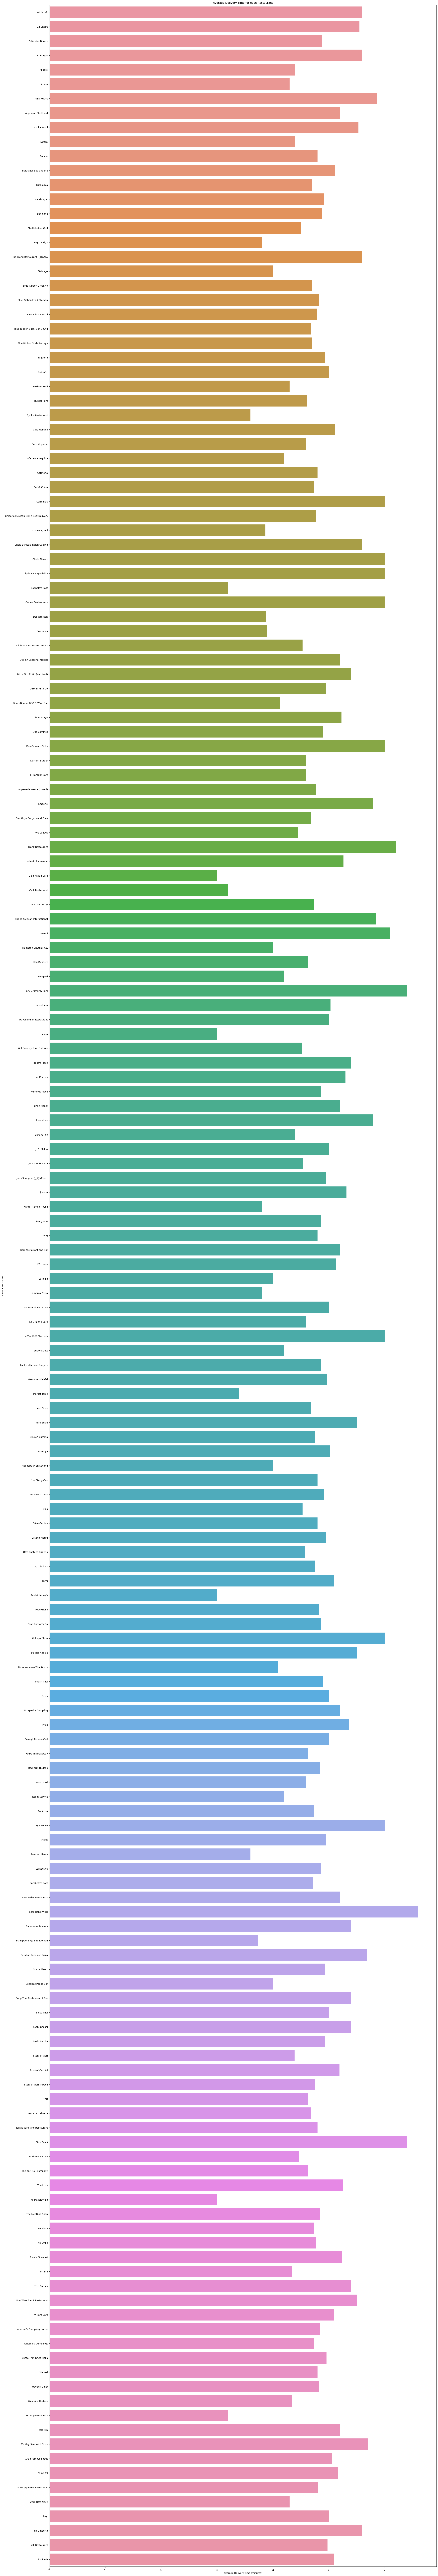

In [104]:
plt.figure(figsize=(30, 200))
sns.barplot(data=avg_delivery_time, y='restaurant_name', x='delivery_time')
plt.title('Average Delivery Time for each Restaurant')
plt.xlabel('Average Delivery Time (minutes)')
plt.ylabel('Restaurant Name')
plt.xticks(rotation=90)
plt.show()

                                                    Fig No.9    

In [106]:
highest_avg_delivery_time = avg_delivery_time.loc[avg_delivery_time['delivery_time'].idxmax()]

print("Restaurant with the highest average delivery time is:", highest_avg_delivery_time['restaurant_name'])
print("Highest average delivery time:", highest_avg_delivery_time['delivery_time'])

Restaurant with the highest average delivery time is: Sarabeth's West
Highest average delivery time: 33.0


# Observation

* Restaurant with the highest average delivery time is: Sarabeth's West
* Highest average delivery time: 33.0

### •	Is there a correlation between the cost of the order and the rating given?

Correlation between cost_of_the_order and rating: 0.03


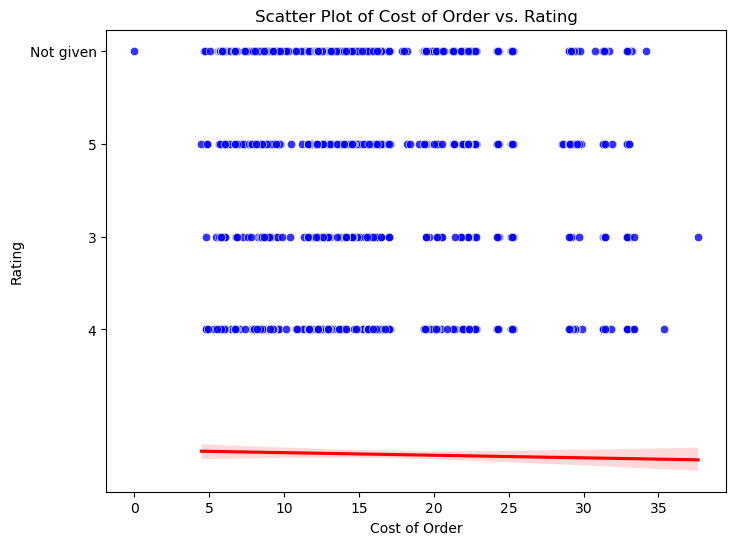

In [107]:
correlation =filtered_df['cost_of_the_order'].corr(df['rating'])
print(f"Correlation between cost_of_the_order and rating: {correlation:.2f}")


plt.figure(figsize=(8,6))
sns.scatterplot(x='cost_of_the_order',y='rating',data = df,color='blue',alpha=0.8)
plt.title('Scatter Plot of Cost of Order vs. Rating')
sns.regplot(data=filtered_df, x='cost_of_the_order', y='rating', scatter=False, color='r')
plt.xlabel('Cost of Order')
plt.ylabel('Rating')
plt.show()

                                               Fig No. 10

# Observation

* Correlation between cost_of_the_order and rating: 0.03

# 4. Demand Patterns

### •	How does the demand for different cuisine types vary on weekdays versus weekends? 

<Figure size 1000x600 with 0 Axes>

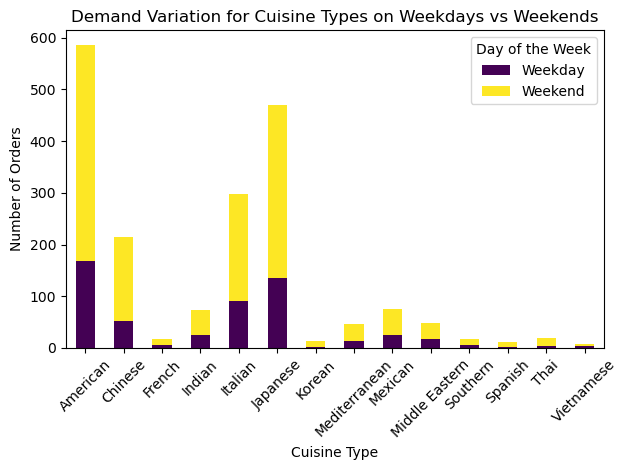

In [108]:
demand_variation = df.groupby(['cuisine_type','day_of_the_week']).size().reset_index(name='order_count')
demand_pivot = demand_variation.pivot(index='cuisine_type', columns='day_of_the_week', values='order_count')

plt.figure(figsize=(10, 6))
demand_pivot.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Demand Variation for Cuisine Types on Weekdays vs Weekends')
plt.xlabel('Cuisine Type')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.legend(title='Day of the Week', loc='upper right')
plt.tight_layout()
plt.show()

                                       Fig No. 11

# Observation
* The demand for American cuisine is highest in the Weekend
* The demand for American cuisine is also highest int he Weekday

### •	Which day of the week has the highest average order cost?

In [109]:
avg_day_cost_of_order = df.groupby('day_of_the_week')['cost_of_the_order'].mean()
highest = avg_day_cost_of_order.sort_values(ascending=False).head(1)
print("Day with the highest average order cost:", highest.index[0])


Day with the highest average order cost: Weekend


# Observation

* Day with the highest average order cost: Weekend

### •	What is the most common day for orders to be placed?

The most common day for orders to be placed is: Weekend


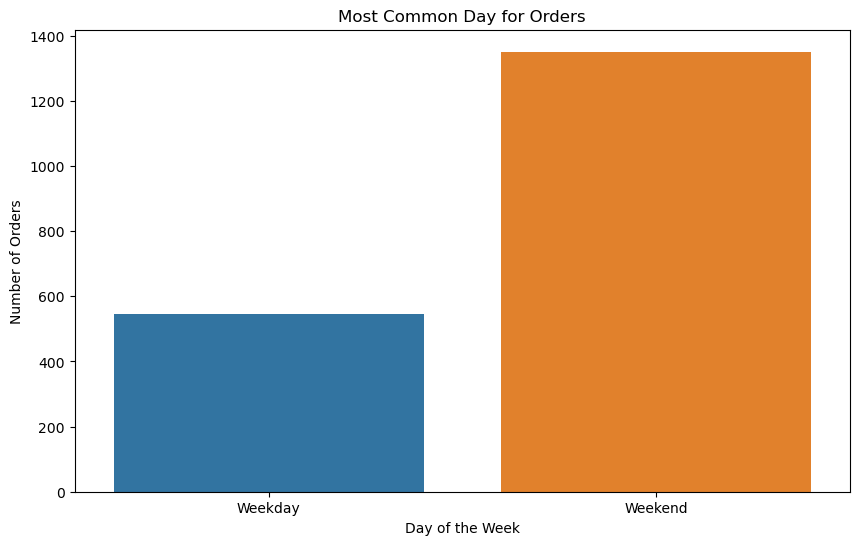

In [110]:
most_comm_day = df.groupby('day_of_the_week').size().reset_index(name='count')

most_common_day = most_comm_day.loc[most_comm_day['count'].idxmax(), 'day_of_the_week']

print("The most common day for orders to be placed is:", most_common_day)

plt.figure(figsize=(10, 6))
sns.barplot(data=most_comm_day, x='day_of_the_week', y='count')
plt.title('Most Common Day for Orders')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.show()
          

          

                                                     Fig No.12

# Observation
* The most common day for orders to be placed is: Weekend


###  •	How does the average rating vary by cuisine type?

In [125]:
avg_rating_by_cuisine_type = filtered_df.groupby('cuisine_type')['rating'].mean()
print(avg_rating_by_cuisine_type)
avg_rating_by_cuisine_type = avg_rating_by_cuisine_type.reset_index()

cuisine_type
American          4.300813
Chinese           4.338346
French            4.300000
Indian            4.540000
Italian           4.360465
Japanese          4.373626
Korean            4.111111
Mediterranean     4.218750
Mexican           4.404255
Middle Eastern    4.235294
Southern          4.307692
Spanish           4.833333
Thai              4.666667
Vietnamese        4.000000
Name: rating, dtype: float64


          Table No. 23

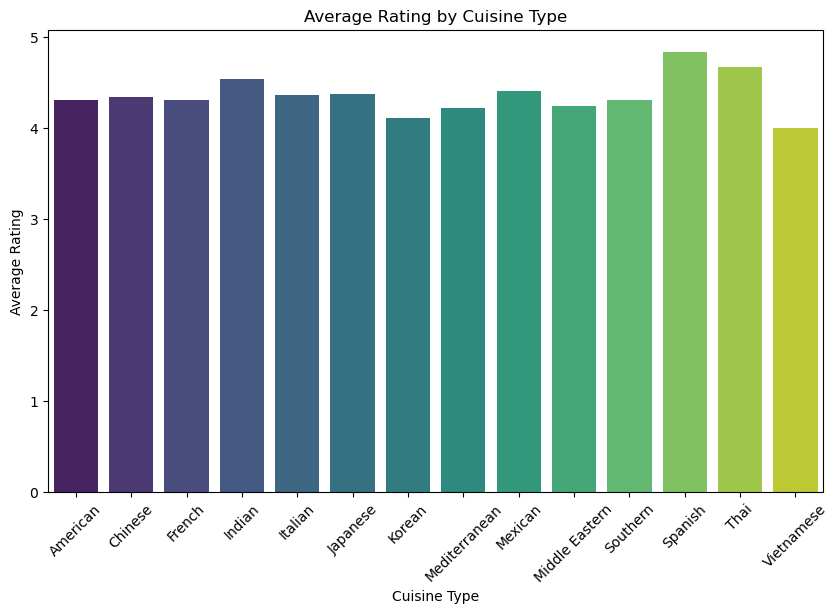

In [124]:
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_rating_by_cuisine_type, x='cuisine_type', y='rating', palette='viridis')
plt.title('Average Rating by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

                                                Fig No. 13

# Observation

* Restaurant with highest average rating by cuisine is Spanish and the least rated is Vietnamese

# 5. Operational Efficiency

###  •	What is the average delivery time for all orders?

In [112]:
avg_delivery_time_for_all_orders = df['delivery_time'].mean()
print("Average delivery time for all orders is: ",avg_delivery_time_for_all_orders)

Average delivery time for all orders is:  24.162447257383963


# Observation

* Average delivery time for all orders is:  24.162447257383963

### • Which restaurant has the longest average delivery time?

Restaurant with the highest average delivery time is: Sarabeth's West


C:\Users\basha\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\basha\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


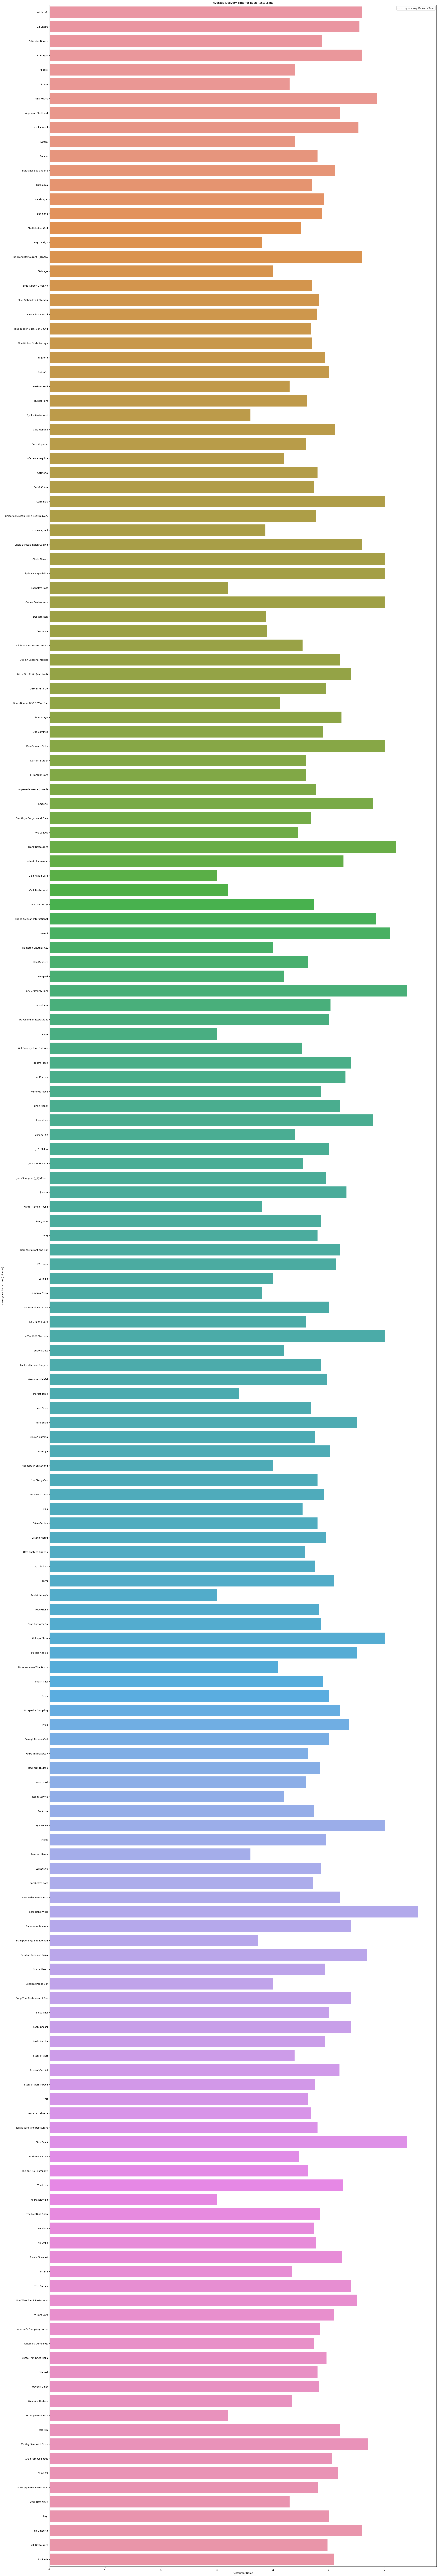

In [113]:
avg_delivery_time = df.groupby('restaurant_name')['delivery_time'].mean().reset_index(name='avg_delivery_time')

highest_avg_delivery_time = avg_delivery_time.loc[avg_delivery_time['avg_delivery_time'].idxmax()]

print("Restaurant with the highest average delivery time is:", highest_avg_delivery_time['restaurant_name'])


plt.figure(figsize=(30, 200))
sns.barplot(data=avg_delivery_time, y='restaurant_name', x='avg_delivery_time')
plt.title('Average Delivery Time for Each Restaurant')
plt.xlabel('Restaurant Name')
plt.ylabel('Average Delivery Time (minutes)')
plt.xticks(rotation=90)

plt.axhline(y=highest_avg_delivery_time['avg_delivery_time'], color='r', linestyle='--', label='Highest Avg Delivery Time')
plt.legend()

plt.show()

                                                   Fig No.14

# Observation
* Restaurant with the highest average delivery time is: Sarabeth's West

### • Is there a relationship between food preparation time and delivery time?

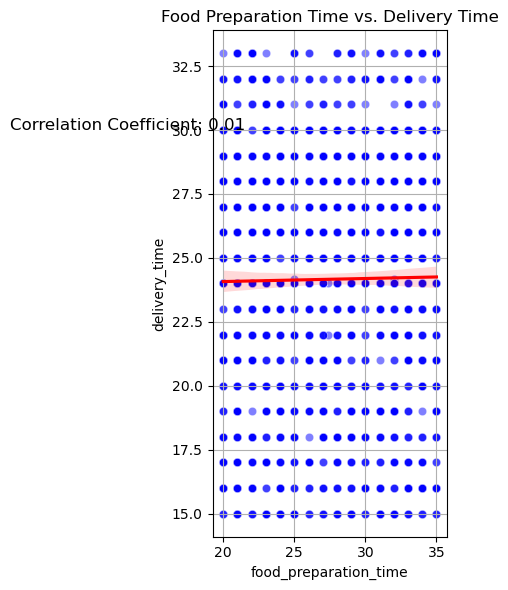

In [114]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='food_preparation_time', y='delivery_time', color='b', alpha=0.5)
plt.title('Food Preparation Time vs. Delivery Time')
plt.xlabel('Food Preparation Time (minutes)')
plt.ylabel('Delivery Time (minutes)')

sns.regplot(data=df, x='food_preparation_time', y='delivery_time', scatter=False, color='r')

correlation_coefficient = df['food_preparation_time'].corr(df['delivery_time'])
plt.text(5, 30, f'Correlation Coefficient: {correlation_coefficient:.2f}', fontsize=12)

plt.grid(True)
plt.tight_layout()
plt.show()

                                     Fig No.15

# Observation
* coefficient of correlation between food preparation and delviery time is 0.01

### •	How does the delivery time impact customer ratings?

In [115]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1162 entries, 2 to 1896
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1162 non-null   int64  
 1   customer_id            1162 non-null   int64  
 2   restaurant_name        1162 non-null   object 
 3   cuisine_type           1162 non-null   object 
 4   cost_of_the_order      1162 non-null   float64
 5   day_of_the_week        1162 non-null   object 
 6   rating                 1162 non-null   float64
 7   food_preparation_time  1162 non-null   float64
 8   delivery_time          1162 non-null   float64
dtypes: float64(4), int64(2), object(3)
memory usage: 123.1+ KB


                      Table No. 24

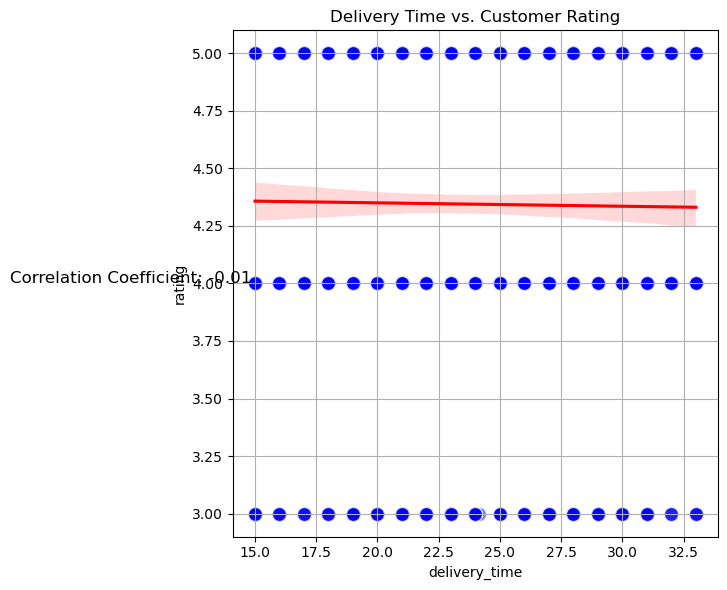

In [116]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=filtered_df, x='delivery_time', y='rating', color='b', s=100, alpha=0.5)
plt.title('Delivery Time vs. Customer Rating')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Customer Rating')

sns.regplot(data=filtered_df, x='delivery_time', y='rating', scatter=False, color='r')
correlation_coefficient = filtered_df['delivery_time'].corr(df['rating'])
plt.text(5, 4, f'Correlation Coefficient: {correlation_coefficient:.2f}', fontsize=12)

plt.grid(True)
plt.tight_layout()
plt.show()

                                                           Fig No.16

# Observation
* As we can see from the scatter plot between rating and delivery time the coefficient of correlation is 0.01

# 6. Customer Insights

### •	What is the repeat order rate (number of customers who have placed more than one order)?

Repeat Order Rate: 34.67%


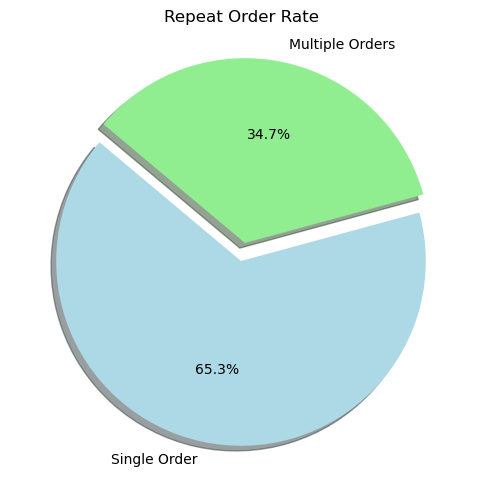

In [117]:
orders_per_customer = df.groupby('customer_id')['order_id'].nunique()

customers_with_multiple_orders = (orders_per_customer > 1).sum()
total_customers = orders_per_customer.count()
repeat_order_rate = (customers_with_multiple_orders / total_customers) * 100

print(f"Repeat Order Rate: {repeat_order_rate:.2f}%")

labels = ['Single Order', 'Multiple Orders']
sizes = [total_customers - customers_with_multiple_orders, customers_with_multiple_orders]
colors = ['lightblue', 'lightgreen']
explode = (0, 0.1)  # explode the second slice (multiple orders)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Repeat Order Rate')
plt.show()


                            Fig No. 17

# Observation

* Repeat Order Rate: 34.67%

### • What percentage of orders receive a rating of 4 or higher?

Percentage of orders with rating greater than 4: 50.60%


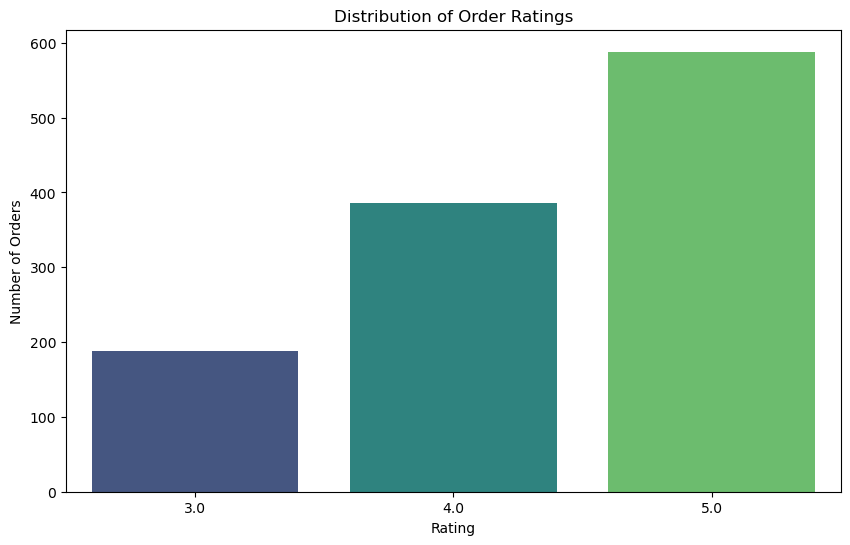

In [120]:
rating_per_order = filtered_df.groupby('order_id')['rating'].mean()
order_with_rating_four_greater = (rating_per_order > 4).sum()
total_orders = rating_per_order.count()

# Calculate percentage of orders with rating > 4
order_rating_percentage = (order_with_rating_four_greater / total_orders) * 100

print(f"Percentage of orders with rating greater than 4: {order_rating_percentage:.2f}%")

plt.figure(figsize=(10, 6))
sns.countplot(data=filtered_df, x='rating', palette='viridis')
plt.title('Distribution of Order Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Orders')
plt.show()

                                                   Fig No. 18                            

# Observation
* Percentage of orders with rating greater than 4: 50.60%